# Decision Tree Regression

Quando roda, o algoritmo divide o data set em dois pelo eixo da variavel `X1`, e joga parte pra um lado e depois para outro. Em seguida, divide uma parte pelo eixo da variavel `X2`, a outra também pela variavel `X2`, e assim por diante.


Para prever o valor, damos os valores das variaveis `X1` e `X2`, é encontrado o quadrante desse ponto e o `y` é **a média dos valores** de `y` desse box


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:,1:2].values
y = dataset.iloc[:,2].values

In [3]:
# Feature Scalling - necessario para o SVR
#from sklearn.preprocessing import StandardScaler

#sc_X = StandardScaler()
#sc_y = StandardScaler()
#X = sc_X.fit_transform(X)
#y = sc_y.fit_transform(y)


In [9]:
from sklearn.tree import DecisionTreeRegressor

regressor = DecisionTreeRegressor(random_state=0)

regressor.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, presort=False, random_state=0,
           splitter='best')

In [10]:
# Aplicar o scaller no valor 6.5 que queremos prever
y_pred = regressor.predict(6.5)
y_pred


array([ 150000.])

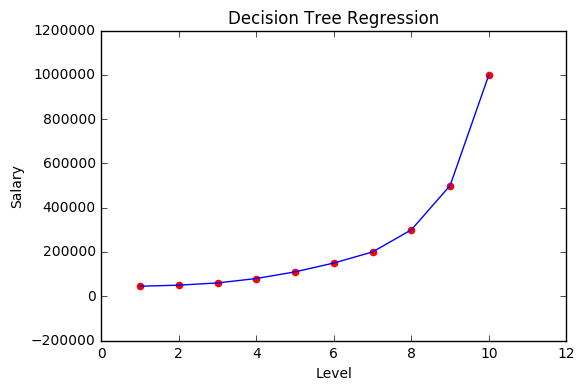

In [11]:
plt.scatter(X, y, color='red')
plt.plot(X, regressor.predict(X), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

O modelo está muito bem encaixado com as observações. **Cuidado**! É uma armadilha!

Veja abaixo com mais valores no nível, como ficará o modelo.

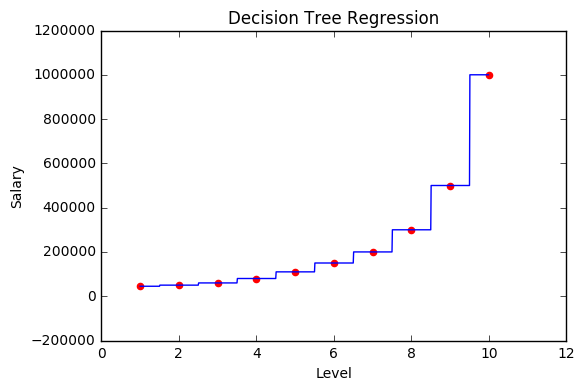

In [14]:
# Curva de predicao mais detalhada
X_grid = np.arange(min(X), max(X), 0.01)
X_grid = X_grid.reshape((len(X_grid), 1))

plt.scatter(X, y, color='red')
plt.plot(X_grid, regressor.predict(X_grid), color = 'blue')
plt.title('Decision Tree Regression')
plt.xlabel('Level')
plt.ylabel('Salary')
plt.show()

Como esse modelo tira a média dentro da _caixa_ então as faixas serão iguais em cada uma dessas caixas, e subindo gradualmente, de acordo com a _caixa_.

Esse modelo é não linear, por isso que ele não se encaixa bem.